# Importing the necessary libraries 

In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import matplotlib as mat
import seaborn as sns
import numpy as np


# Reading the file 

In [2]:
df_bh =pd.read_csv('data03.csv')
df_bh

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,Sao Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,Sao Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df_bh.shape #returns number of rows and columns 

(10692, 13)

In [4]:
df_bh.columns #returns array of columns in dataset 

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [5]:
df_bh.isnull().sum() #Checking if there are null values in any columns

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
df_bh.info() # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


LEVEL 1 Analysis 
-------------------------
Identify the type of data in each column (categorical or numerical)?
1. Seperate out the categorical columns from the numerical types.

### Following are the kinds of analysis that can be performed on categorical data:
1. Check if the variable is  Nominal or Ordinal.
2. Check how many categories are present in a variable.
3. Check the Mode of a variable.
4. Check for Missing values of a variable.
5. Think how the missing values could be treated.
6. What kind of graph/chart can be plotted using this data?

# Separating Categorical and Numerical Variables

In [7]:
def seprate_data_types(df_bh):
    categorical = []
    continuous = []
    for column in df_bh.columns:                
        if df_bh[column].nunique() < 50:       
                                                   
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df_bh)        

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## Level 1 Analysis of categorical columns

In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df_bh[col].unique()}") 
    print(f"Mode of {col} is {df_bh[col].mode()[0]}") 
    print(f"Number of missing values in {col} is {df_bh[col].isnull().sum()}") 
    if df_bh[col].isnull().sum() > 0:  
        print(f"\nThere are null values in the {col} column")

# Analysis of city

In [9]:
info_of_cat("city")

Unique values in city are: ['Sao Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is Sao Paulo
Number of missing values in city is 0


In [10]:
df_bh['city'].describe()

count         10692
unique            5
top       Sao Paulo
freq           5887
Name: city, dtype: object

['Sao Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre', 'Campinas']
Sao Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64


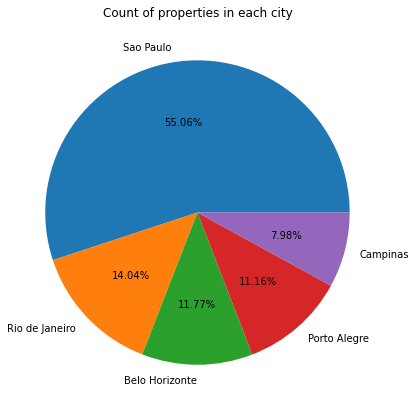

In [11]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_title("Count of properties in each city") 
percentage = df_bh["city"].value_counts() 
labels=list(df_bh["city"].value_counts().index)
print(labels)
print(percentage)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

# Interpretation: The dataset indicates majority of properties (55.06%) are located Sao Paulo and less number of properties (7.98%) are located in Campinas

# Analysis of room

In [12]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


In [13]:
df_bh['rooms'].describe()

count    10692.000000
mean         2.506079
std          1.171266
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: rooms, dtype: float64

In [14]:
#Outlier treatment

In [109]:
upper_limit = df_bh.rooms.mean() + 3*df_bh.rooms.std()
print('Upper Limit:',upper_limit)
lower_limit = df_bh.rooms.mean() - 3*df_bh.rooms.std()
print('Lower Limit:',lower_limit)

Upper Limit: 6.019878073929674
Lower Limit: -1.0077194506599403


In [110]:
r_no_std= df_bh[(df_bh.rooms<upper_limit) & (df_bh.rooms>lower_limit)]
r_no_std.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,Sao Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [111]:
r_no_std.shape

(10640, 13)

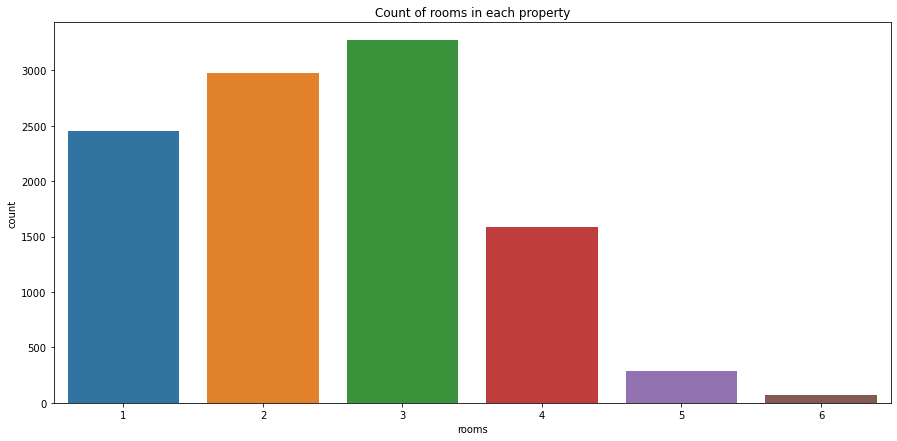

In [112]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title("Count of rooms in each property") 
percentage = r_no_std["rooms"].value_counts() 
labels = list(r_no_std["rooms"].value_counts().index) 
sns.countplot(x = r_no_std["rooms"])
plt.show()

# Interpretation: The dataset indicates majority of properties have 3 rooms.

# Analysis of parking spaces

In [19]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


In [20]:
df_bh['parking spaces'].describe()

count    10692.000000
mean         1.609147
std          1.589521
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: parking spaces, dtype: float64

In [21]:
upper_limit = df_bh['parking spaces'].mean() + 3*df_bh['parking spaces'].std()
print('Upper Limit:',upper_limit)
lower_limit = df_bh['parking spaces'].mean() - 3*df_bh['parking spaces'].std()
print('Lower Limit:',lower_limit)

Upper Limit: 6.377709197230109
Lower Limit: -3.1594151456027237


In [22]:
ps_no_std= df_bh[(df_bh['parking spaces']<upper_limit) & (df_bh['parking spaces']>lower_limit)]
ps_no_std.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,Sao Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [23]:
ps_no_std.shape

(10533, 13)

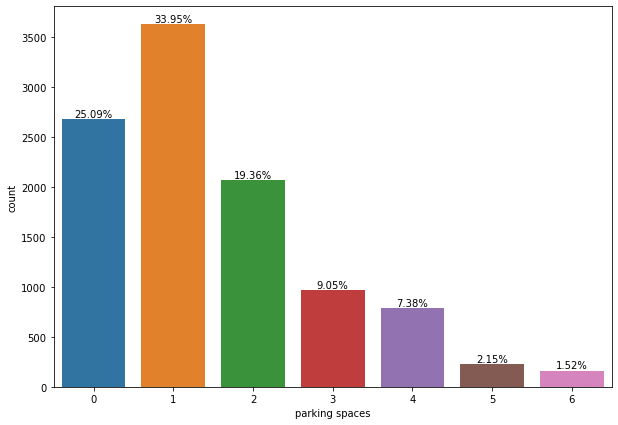

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
ax= sns.countplot(x = ps_no_std["parking spaces"])
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(df_bh)*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()  

# Interpretation: Most properties in every city has atleast 1 parking space 

# LEVEL 1 Analysis of Numerical Columns

In [31]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df_bh[col].mean()}")
    print(f"The median of the {col} is {df_bh[col].median()}")
    print(f"The mode of the {col} is {df_bh[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df_bh[col].std()}")
    print(f"Number of missing values in the {col} is {df_bh[col].isnull().sum()}")

# Analysis of rent amount

In [43]:
info_of_numerical('rent amount (R$)')

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816
Number of missing values in the rent amount (R$) is 0


In [44]:
upper_limit = df_bh['rent amount (R$)'].mean() + 3*df_bh['rent amount (R$)'].std()
print('Upper Limit:',upper_limit)
lower_limit = df_bh['rent amount (R$)'].mean() - 3*df_bh['rent amount (R$)'].std()
print('Lower Limit:',lower_limit)

Upper Limit: 14121.883747177106
Lower Limit: -6329.389358849383


In [45]:
ra_no_std= df_bh[(df_bh['rent amount (R$)']<upper_limit) & (df_bh['rent amount (R$)']>lower_limit)]
ra_no_std.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,Sao Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [46]:
ra_no_std.shape

(10436, 13)

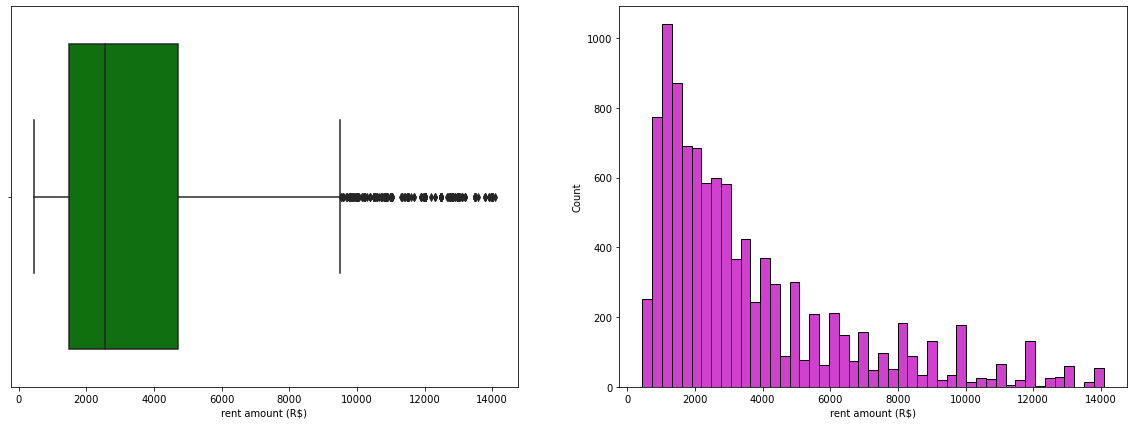

In [47]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x=ra_no_std["rent amount (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = ra_no_std["rent amount (R$)"], ax = ax[0], color = "g") 
plt.show()

# Interpretation: The graph shows a dense population around 1500 to 3000 rent amount

# Analysis of property tax

In [48]:
info_of_numerical('property tax (R$)')

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161917
Number of missing values in the property tax (R$) is 0


In [87]:
upper_limit = df_bh['property tax (R$)'].mean() + 0.5*df_bh['property tax (R$)'].std()
print('Upper Limit:',upper_limit)
lower_limit = df_bh['property tax (R$)'].mean() - 0.5*df_bh['property tax (R$)'].std()
print('Lower Limit:',lower_limit)

Upper Limit: 1920.6205189797615
Lower Limit: -1187.2118021821557


In [88]:
pt_no_std= df_bh[(df_bh['property tax (R$)']<upper_limit) & (df_bh['property tax (R$)']>lower_limit)]
pt_no_std.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,Sao Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [89]:
pt_no_std.shape        

(10436, 13)

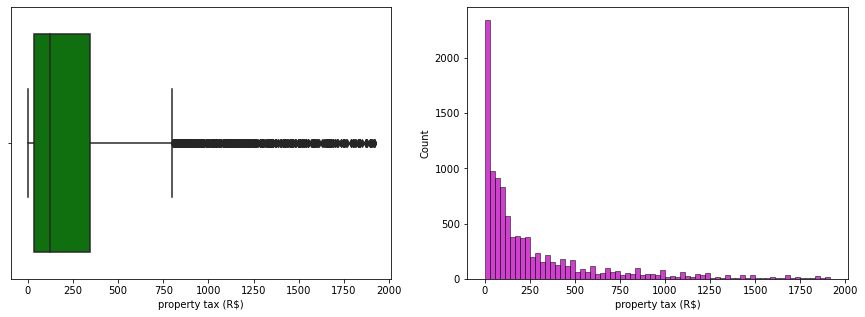

In [90]:
fig, ax = plt.subplots(1, 2, figsize= (15, 5))               
sns.histplot(x = pt_no_std["property tax (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = pt_no_std["property tax (R$)"], ax = ax[0], color = "g") 
plt.show()

# Interpretation: Majority of the property tax lie around 0 to 250

# Analysis of total

In [53]:
info_of_numerical('total (R$)')

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.72591235027
Number of missing values in the total (R$) is 0


In [54]:
df_bh['total (R$)'].describe()

count    1.069200e+04
mean     5.490487e+03
std      1.648473e+04
min      4.990000e+02
25%      2.061750e+03
50%      3.581500e+03
75%      6.768000e+03
max      1.120000e+06
Name: total (R$), dtype: float64

In [101]:
upper_limit = df_bh['total (R$)'].mean() + 1*df_bh['total (R$)'].std()
print('Upper Limit:',upper_limit)
lower_limit = df_bh['total (R$)'].mean() - 1*df_bh['total (R$)'].std()
print('Lower Limit:',lower_limit)

Upper Limit: 21975.21291197616
Lower Limit: -10994.23891272438


In [102]:
t_no_std= df_bh[(df_bh['total (R$)']<upper_limit) & (df_bh['total (R$)']>lower_limit)]
t_no_std.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Sao Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Sao Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,Sao Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [103]:
t_no_std.shape

(10631, 13)

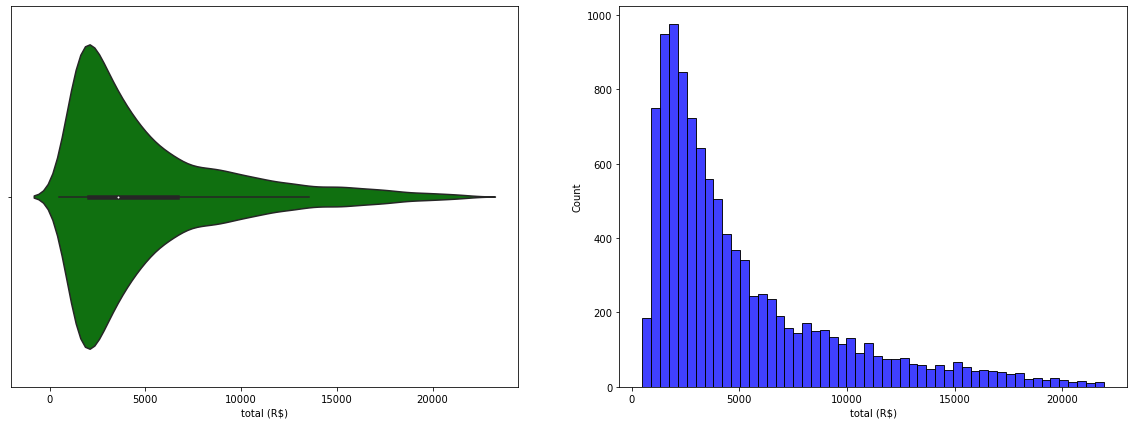

In [104]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = t_no_std['total (R$)'], ax =ax[1], color = "b") 
sns.violinplot(x = t_no_std['total (R$)'], ax = ax[0], color = "g") 
plt.show()

# Interpretation: From both plots we can conclude that total amount for houses is dense in the region below 5000.

In [98]:
###Scenario 1 ###
## Analysing the effect of furniture on rent amount in different cities ##
ra_no_std.groupby('furniture')['rent amount (R$)'].mean().sort_values()


furniture
not furnished    3335.641009
furnished        4494.938272
Name: rent amount (R$), dtype: float64

<Figure size 1080x432 with 0 Axes>

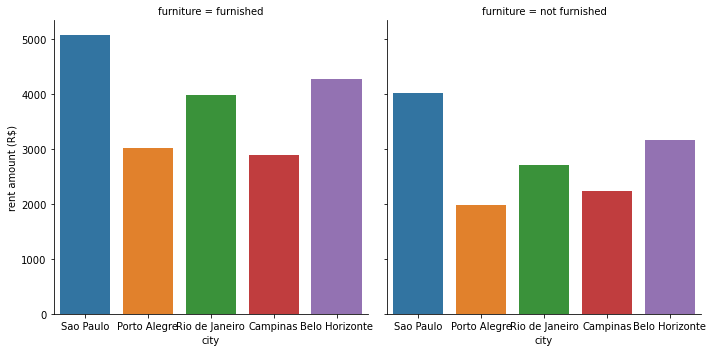

In [99]:
plt.figure(figsize=(15,6))
sns.catplot(x='city', y ='rent amount (R$)', col ='furniture', kind= 'bar', ci= False, data= ra_no_std)
plt.show()

# Interpretation: Furnished properties in Sao Paulo are more expensive

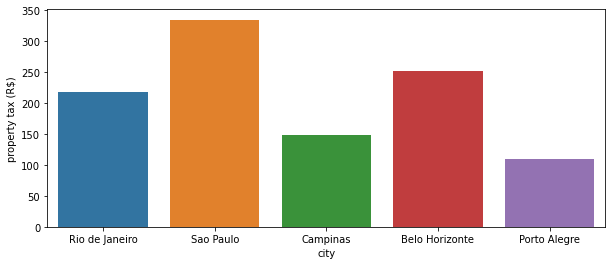

In [91]:
### Scenrio 2 ###
## Relationship between houses with a higher property tax and higher rent value ##
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'property tax (R$)',data= pt_no_std,ci=0, order= ('Rio de Janeiro','Sao Paulo','Campinas','Belo Horizonte','Porto Alegre'))
plt.show()

In [92]:
pt_no_std.groupby('city')['property tax (R$)'].mean().sort_values()

city
Porto Alegre      109.796125
Campinas          147.657679
Rio de Janeiro    218.089082
Belo Horizonte    251.021600
Sao Paulo         334.557757
Name: property tax (R$), dtype: float64

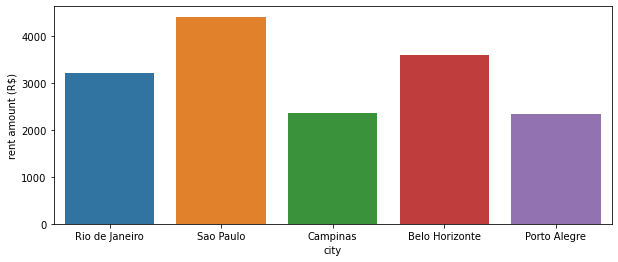

In [93]:
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'rent amount (R$)',data= pt_no_std,ci=False, order= ('Rio de Janeiro','Sao Paulo','Campinas','Belo Horizonte','Porto Alegre'))
plt.show()

In [94]:
pt_no_std.groupby('city')['rent amount (R$)'].mean().sort_values()

city
Porto Alegre      2330.813816
Campinas          2364.290739
Rio de Janeiro    3209.048225
Belo Horizonte    3602.058400
Sao Paulo         4414.072174
Name: rent amount (R$), dtype: float64

# Interpretation: There is no relation between property tax and the rent because the city with higher rent has higher property tax as well

In [95]:
### Scenario 3 ###
## Analysis of city with highest total price ##
ra_no_std["city"].groupby(ra_no_std["total (R$)"]).value_counts().rename("Count").reset_index()


,total (R$),city,Count
0,499,Belo Horizonte,1
1,507,Rio de Janeiro,2
2,508,Sao Paulo,1
3,509,Porto Alegre,1
4,545,Belo Horizonte,1
...,...,...,...
7848,32750,Porto Alegre,1
7849,95610,Rio de Janeiro,1
7850,233200,Sao Paulo,1
7851,316900,Sao Paulo,1


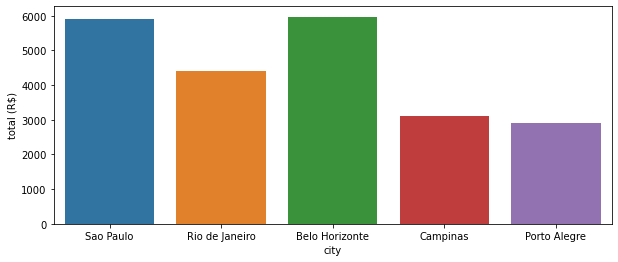

In [100]:
plt.figure(figsize=(10,4))
sns.barplot(x= ra_no_std['city'], y= ra_no_std['total (R$)'],ci= False,order=["Sao Paulo", "Rio de Janeiro","Belo Horizonte","Campinas","Porto Alegre"])
plt.show()

# Interpretation: Sao Paulo and Belo Horizonte has the highest total amount

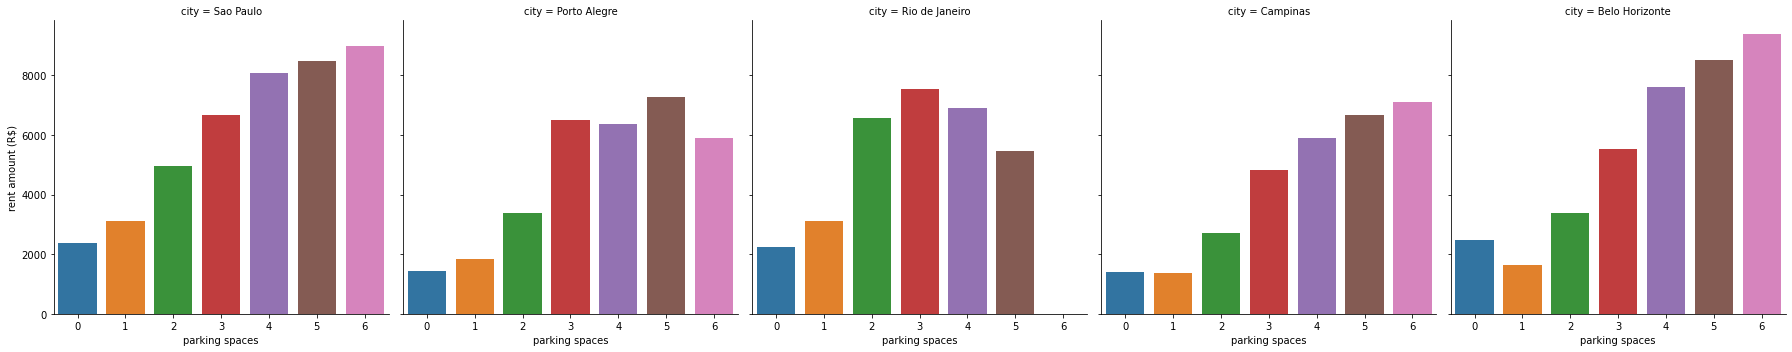

In [97]:
### Scenario 4 ###
## Analysing the effect of parking space on rent amount in different cities##
sns.catplot(x='parking spaces', y ='rent amount (R$)', col ='city', kind= 'bar', ci= False, data= ps_no_std)
plt.show()

# Interpretation: Higher the number of parking space higher is the rent amount in every every city of Brazil.

# Conclusion:  Cities having greater property tax, rent amount, total prices, and more parking spaces are Sao Paulo and Belo Horizonte. Houses with furnishings have expensive rent amount, costing an average of $4494.93.

## People can relocate to Campinas and Porto Alegre to live and work remotely because it has the most affordable houses in their vicinity.